In [ ]:
#get data / data acquisition 
from google.colab import files 
new_file = files.upload()

Saving survey.csv to survey.csv


In [ ]:
#data acquisition 
import pandas as pd

df = pd.read_csv('survey.csv')
df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

In [ ]:
data = df.drop(['ID', 'Region of residence', 'Medium for online class', 'Prefered social media platform', 'Time spent on TV', 'Number of meals per day', 'Change in your weight', 'Health issue during lockdown', 'Stress busters', 'Time utilized', 'Do you find yourself more connected with your family, close friends , relatives  ?', 'What you miss the most'], axis= 1)
data

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media
0,21,2.0,Good,4.0,0.0,7.0,3.0
1,21,0.0,Excellent,0.0,2.0,10.0,3.0
2,20,7.0,Very poor,3.0,0.0,6.0,2.0
3,20,3.0,Very poor,2.0,1.0,6.0,5.0
4,21,3.0,Good,3.0,1.0,8.0,3.0
...,...,...,...,...,...,...,...
1177,12,3.0,Good,4.0,1.0,8.0,1.0
1178,14,6.0,Average,4.0,1.0,9.0,1.0
1179,13,4.0,Average,0.0,0.5,8.0,3.0
1180,14,5.0,Excellent,3.5,1.0,8.0,0.5


In [ ]:
data.isnull().sum()

Age of Subject                        0
Time spent on Online Class            0
Rating of Online Class experience    24
Time spent on self study              0
Time spent on fitness                 0
Time spent on sleep                   0
Time spent on social media            0
dtype: int64

In [ ]:

#Remove string and replace with int for classification
data['Rating of Online Class experience'] = data['Rating of Online Class experience'].replace(['Very poor', 'Poor', 'Average', 'Good', 'Excellent'], [0,1,2,3,4])
#data.drop(['Institution'], axis=1).head(12)
data

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media
0,21,2.0,3.0,4.0,0.0,7.0,3.0
1,21,0.0,4.0,0.0,2.0,10.0,3.0
2,20,7.0,0.0,3.0,0.0,6.0,2.0
3,20,3.0,0.0,2.0,1.0,6.0,5.0
4,21,3.0,3.0,3.0,1.0,8.0,3.0
...,...,...,...,...,...,...,...
1177,12,3.0,3.0,4.0,1.0,8.0,1.0
1178,14,6.0,2.0,4.0,1.0,9.0,1.0
1179,13,4.0,2.0,0.0,0.5,8.0,3.0
1180,14,5.0,4.0,3.5,1.0,8.0,0.5


In [ ]:

data['Rating of Online Class experience'].fillna(2, inplace = True)
data.isnull().sum()

Age of Subject                       0
Time spent on Online Class           0
Rating of Online Class experience    0
Time spent on self study             0
Time spent on fitness                0
Time spent on sleep                  0
Time spent on social media           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age of Subject                     1182 non-null   int64  
 1   Time spent on Online Class         1182 non-null   float64
 2   Rating of Online Class experience  1182 non-null   float64
 3   Time spent on self study           1182 non-null   float64
 4   Time spent on fitness              1182 non-null   float64
 5   Time spent on sleep                1182 non-null   float64
 6   Time spent on social media         1182 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 64.8 KB


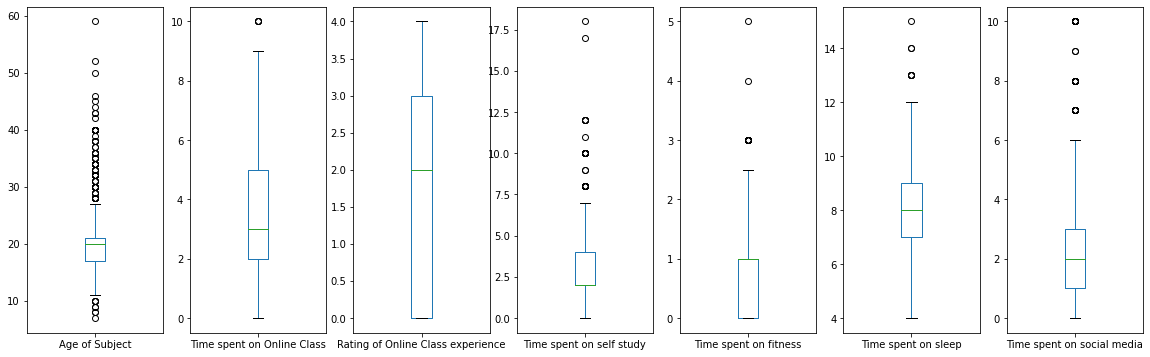

In [ ]:
import matplotlib.pyplot as plt
data.plot(kind = 'box', subplots = True, layout = (1, 7), sharex = False, sharey = False, figsize=(20,6))
plt.show()


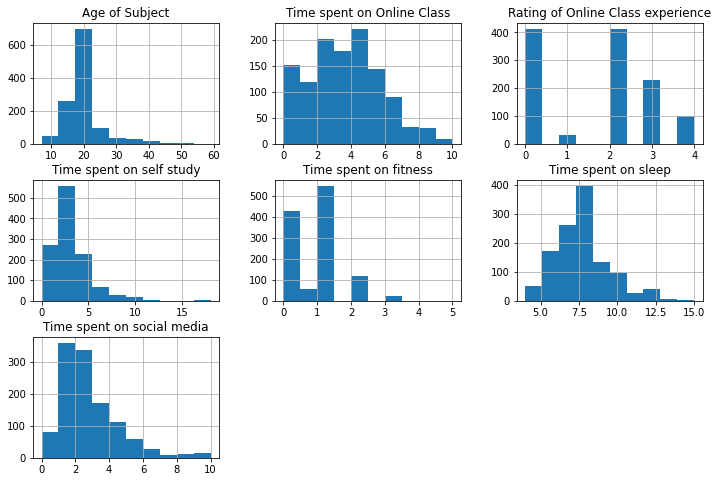

In [ ]:
data.hist()
his = plt.gcf()
his.set_size_inches(12, 8)
plt.show()


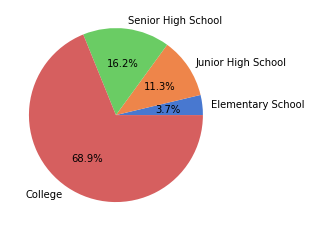

In [ ]:
#define data
data = [44,133, 191, 814]
labels = ['Elementary School', 'Junior High School', 'Senior High School', 'College']

#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

In [ ]:
all_inputs = data.drop('Rating of Online Class experience', axis=1)

In [ ]:
import numpy as np
all_labels = np.ravel(data[['Rating of Online Class experience']])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.3, random_state=42)